In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_excel("data/EH_training.xlsx" , engine='openpyxl')

Big3 = ['Bench','Squat','Deadlift']

df['RPE'] = df['RPE'].apply(lambda x: str(x).split('@')[-1])
df['RPE'] = df['RPE'].apply(lambda x: str(x).split('-')[-1])


df['Volume'] = df['Sets'] * df['Reps']
df['Tonnage'] = df['Volume']*df['Load']
df['Big3'] = df.apply(lambda x: x['Exercise'].split(' ')[-1], axis=1)
df.replace({'Press':'Bench','Deadlifts':'Deadlift', 'Beench':'Bench'}, inplace=True)
df = df[df['Big3'].isin(Big3)]

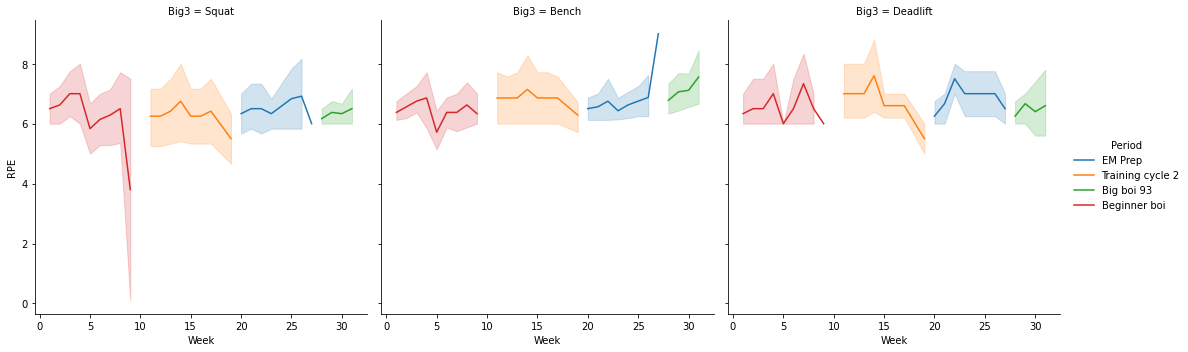

In [37]:
RPE_data = df[df.RPE != 'opener']
RPE_data = RPE_data[RPE_data.RPE != 'nan']
RPE_data = RPE_data[RPE_data.RPE != 'Opener']
RPE_data = RPE_data[RPE_data.RPE != 'last warmup']
RPE_data['RPE'] = RPE_data['RPE'].astype(float)
sns.relplot(data=RPE_data, y='RPE', col='Big3',x='Week', hue='Period', kind='line')

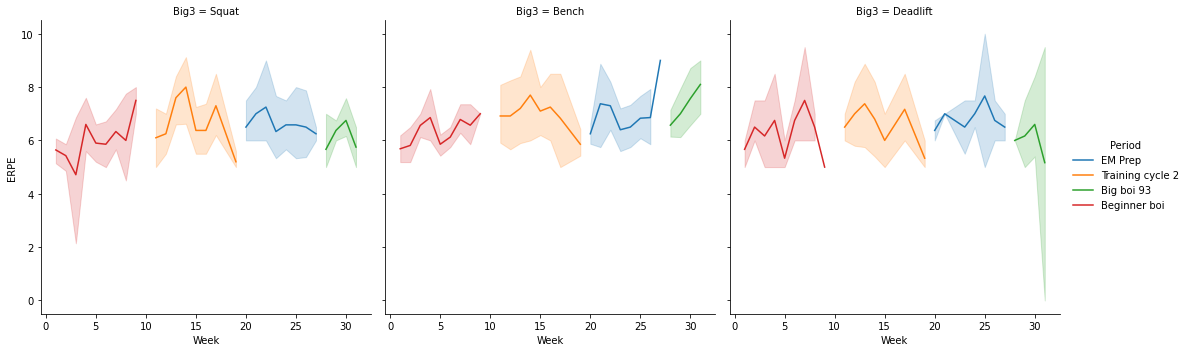

In [188]:
sns.relplot(data=df, y='ERPE', col='Big3',x='Week', hue='Period', kind='line')

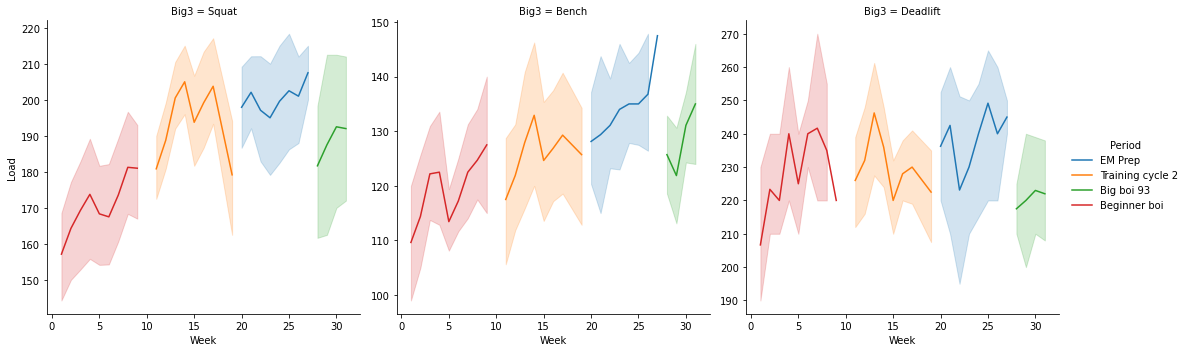

In [42]:
sns.relplot(data=df, y='Load', col='Big3',x='Week', hue='Period', kind='line', facet_kws=dict(sharey=False))


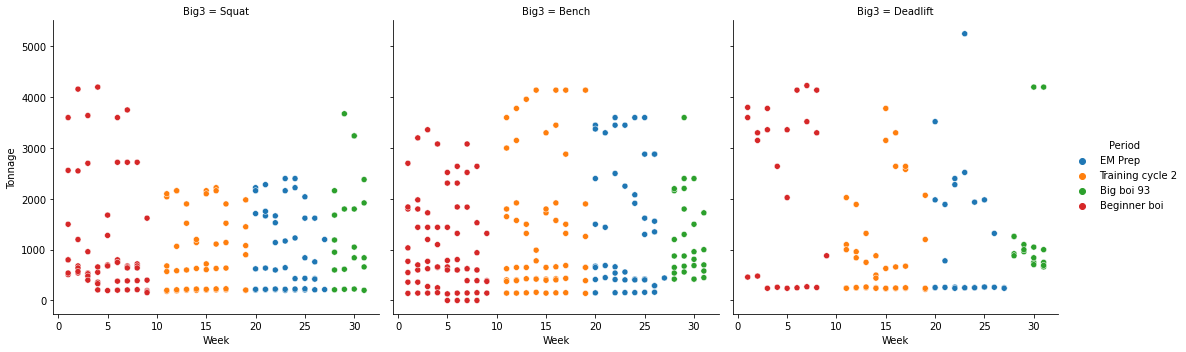

In [5]:
sns.relplot(data=df, y='Tonnage', col='Big3',x='Week', hue='Period', kind='scatter')

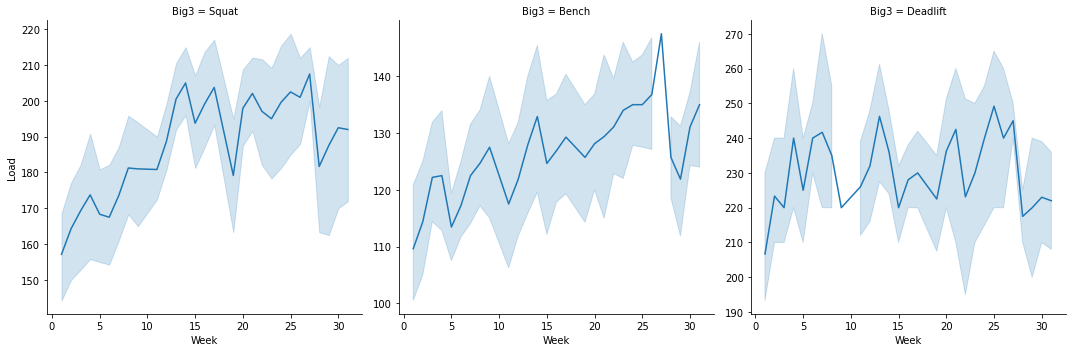

In [13]:
sns.relplot(data=df, y='Load', col='Big3',x='Week', kind='line', facet_kws=dict(sharey=False))

([<matplotlib.patches.Wedge at 0x7f0ff1e6eb70>,
 [Text(0.7657473043154236, 0.7897031505152188, 'S'),
  Text(-1.0496433886430685, -0.3290117880530977, 'B'),
  Text(0.9668938553891931, -0.5245152737629499, 'D')])

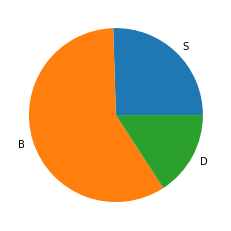

In [21]:
squat_volume = df[df['Big3'] == 'Squat']['Volume'].sum()
bench_volume = df[df['Big3'] == 'Bench']['Volume'].sum()
deadlift_volume = df[df['Big3'] == 'Deadlift']['Volume'].sum()

plt.pie(x=[squat_volume, bench_volume, deadlift_volume],labels=['S','B','D'])